In [1]:
import numpy as np
import cv2
import glob
from mtcnn import MTCNN
from joblib import load
import matplotlib.pyplot as plt


c:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
detector = MTCNN()
model = load("model_SVC.z")

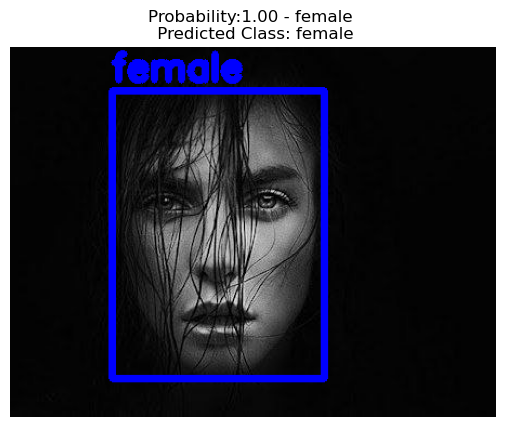

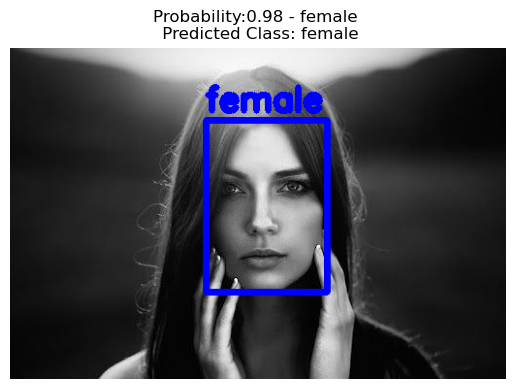

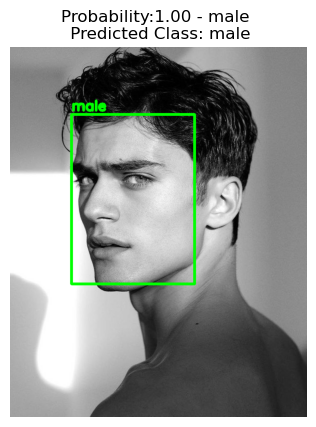

In [24]:
def face_detector(img):
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out = detector.detect_faces(rgb_img)[0]
    x, y, w, h = out["box"]
    confidence = out["confidence"]
    return img[y:y+h, x:x+w], x, y, w, h,confidence
    
    
for item in glob.glob('pictures\\*'):
    img = cv2.imread(item)
    face, x, y, w, h,confidence = face_detector(img)
    
    if face is None: continue
    
    face = cv2.resize(face, (32, 32))
    face = face.flatten()
    face = face/255.0
    
    out = model.predict([face])[0]

    text=f'Probability:{confidence:.2f} - {out}'
    if out == "male":
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
        cv2.putText(img, out, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    1.15, (0, 255, 0), 5)
        
    elif out == "female":
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
        cv2.putText(img, out, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    1.15, (0, 0, 255), 5)
    
    sample_image_reshaped = img
    plt.imshow(sample_image_reshaped, cmap=None)
    plt.title(f"{text} \n Predicted Class: {out}")
    plt.axis('off')
    plt.show()
